# Izhikevich model tutorials:

Targeted audience: Who is aware of what Spiking Neural Networks is and exploring Eugene Izhikevich's model.<br>The content of this document is based on the Izhikevich's model in the paper<br>
https://www.izhikevich.org/publications/spikes.pdf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### How does v vary without u

In [155]:
v=-65*np.ones([1,1])
u=0
I=0
v_trail=np.array([]).reshape([0,2])

In [156]:
for t in range(20):
    print(v)
    v_trail = np.concatenate((v_trail,np.concatenate((t+0*v,v),axis=1)),axis=0)
    v = v + 0.04*v*v + 5*v +140 -u +I

[[-65.]]
[[-81.]]
[[-83.56]]
[[-82.069056]]
[[-83.00113789]]
[[-82.4392717]]
[[-82.78628946]]
[[-82.57494786]]
[[-82.7048066]]
[[-82.62543821]]
[[-82.67410768]]
[[-82.64432285]]
[[-82.66257313]]
[[-82.65139892]]
[[-82.65824378]]
[[-82.65405209]]
[[-82.65661947]]
[[-82.65504713]]
[[-82.65601013]]
[[-82.65542035]]


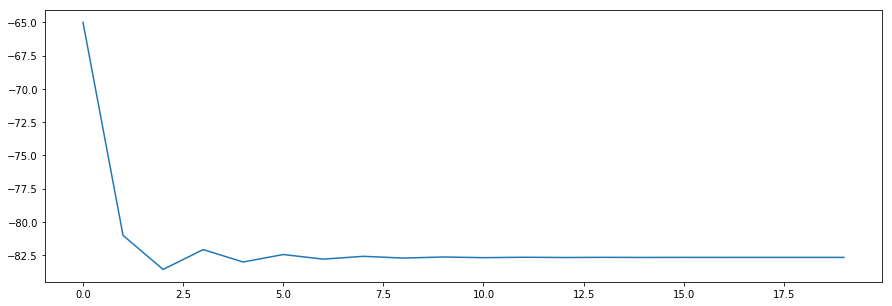

In [157]:
plt.figure(figsize=[15,5])
plt.plot(v_trail[:,0],v_trail[:,1])
plt.show()

### How does v vary with u

In [158]:
a = 0.02
b = 0.2

I=0
u = 0
v=-65*np.ones([1,1])
v_trail=np.array([]).reshape([0,2])

In [159]:
for t in range(20):
    print(u)
    v_trail = np.concatenate((v_trail,np.concatenate((t+0*v,v),axis=1)),axis=0)
    v = v + 0.04*v*v + 5*v +140 -u +I
    u = u + a * (b*v-u)

0
[[-0.324]]
[[-0.650464]]
[[-0.96399979]]
[[-1.27381739]]
[[-1.57477907]]
[[-1.86999468]]
[[-2.15797993]]
[[-2.43974436]]
[[-2.71497842]]
[[-2.98404503]]
[[-3.24696817]]
[[-3.50393151]]
[[-3.75503987]]
[[-4.00043003]]
[[-4.24022091]]
[[-4.47453542]]
[[-4.70349123]]
[[-4.9272047]]
[[-5.14578933]]


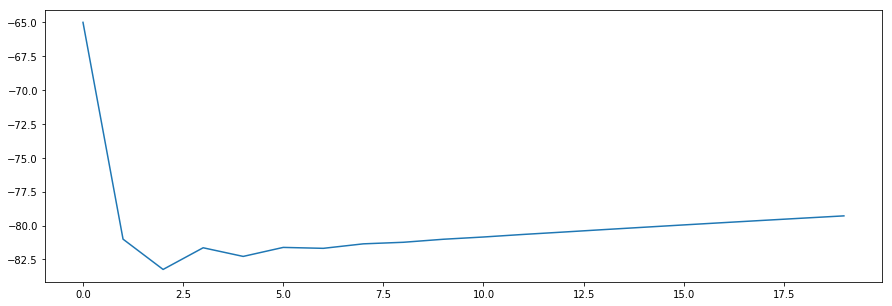

In [160]:
plt.figure(figsize=[15,5])
plt.plot(v_trail[:,0],v_trail[:,1])
plt.show()

#### We understood that by introducing u,v decreases till few time steps and start increases. But it cant reach the threshold.
#### So let us introduce I in next trial

### How does v vary with I

In [161]:
a = 0.02
b = 0.2
v = -65
I = 10
u = 0
v=-65*np.ones([1,1])
v_trail=np.array([]).reshape([0,2])

In [162]:
for t in range(20):
    print(v)
    v_trail = np.concatenate((v_trail,np.concatenate((t+0*v,v),axis=1)),axis=0)
    v = v + 0.04*v*v + 5*v +140 -u +I
    u = u + a * (b*v-u)

[[-65.]]
[[-71.]]
[[-74.076]]
[[-74.39122496]]
[[-74.1244793]]
[[-73.82935813]]
[[-73.53268567]]
[[-73.23550054]]
[[-72.93770823]]
[[-72.63912891]]
[[-72.33956078]]
[[-72.03878337]]
[[-71.73655553]]
[[-71.43261253]]
[[-71.12666242]]
[[-70.8183819]]
[[-70.5074111]]
[[-70.19334749]]
[[-69.87573833]]
[[-69.55407151]]


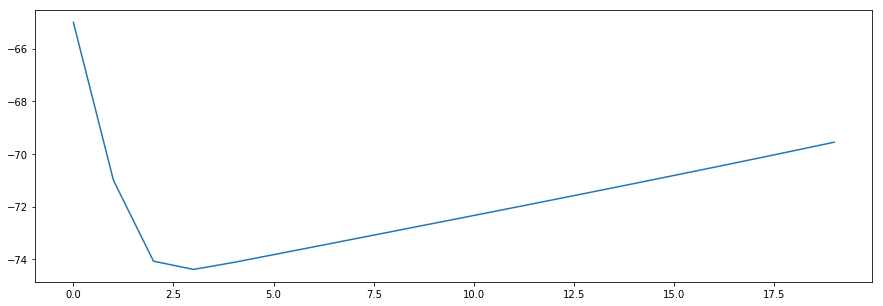

In [163]:
plt.figure(figsize=[15,5])
plt.plot(v_trail[:,0],v_trail[:,1])
plt.show()

#### Lets vary I and check how v varies

In [164]:
a = 0.02
b = 0.2
v = -65
I = 12
u = 0
v=-65*np.ones([1,1])
v_trail=np.array([]).reshape([0,2])

for t in range(20):
    print(u)
    v_trail = np.concatenate((v_trail,np.concatenate((t+0*v,v),axis=1)),axis=0)
    v = v + 0.04*v*v + 5*v +140 -u +I
    u = u + a * (b*v-u)

0
[[-0.276]]
[[-0.555616]]
[[-0.83207183]]
[[-1.1025566]]
[[-1.36643789]]
[[-1.62366442]]
[[-1.87431108]]
[[-2.11847825]]
[[-2.35626879]]
[[-2.58778213]]
[[-2.81311231]]
[[-3.03234702]]
[[-3.2455667]]
[[-3.45284357]]
[[-3.65424036]]
[[-3.84980873]]
[[-4.03958709]]
[[-4.22359768]]
[[-4.40184258]]


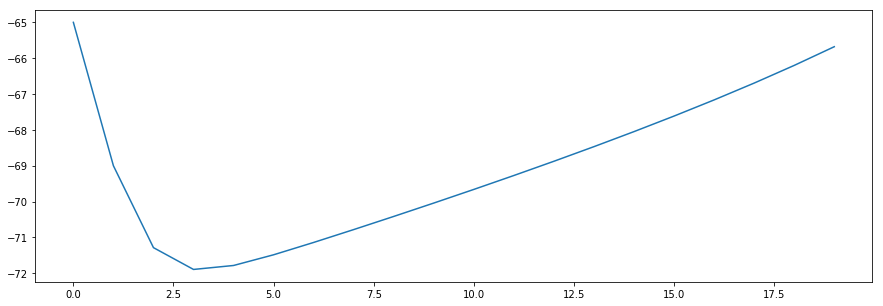

In [165]:
plt.figure(figsize=[15,5])
plt.plot(v_trail[:,0],v_trail[:,1])
plt.show()

#### 'I' pushes up the voltage towards the threshold. We can compare diagrams of I =10 and I =12 and we observe that v rises more as I increases. Eventually both reaches threshold with time. But with increase in I , v will reach threshold quickly.
#### To try this , let us increase I to 15 and check

In [166]:
a = 0.02
b = 0.2
v = -65
I = 15
u = 0*np.ones([1,1])
v=-65*np.ones([1,1])
v_trail=np.array([]).reshape([0,2])
u_trail=np.array([]).reshape([0,2])

for t in range(20):
    u_trail = np.concatenate((u_trail,np.concatenate((t+0*u,u),axis=1)),axis=0)
    v_trail = np.concatenate((v_trail,np.concatenate((t+0*v,v),axis=1)),axis=0)
    v = v + 0.04*v*v + 5*v +140 -u +I
    u = u + a * (b*v-u)

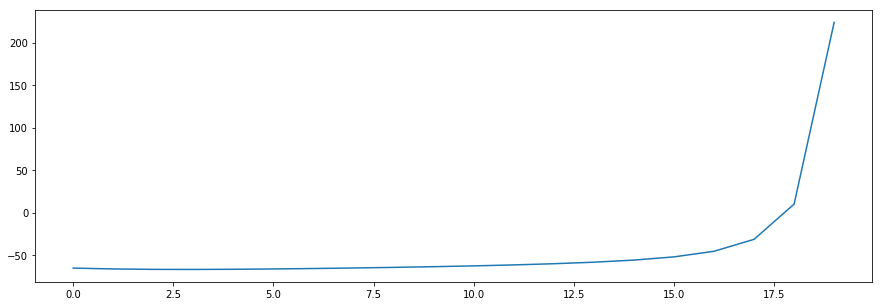

In [167]:
plt.figure(figsize=[15,5])
plt.plot(v_trail[:,0],v_trail[:,1])
plt.show()

### Lets see how value of u varies across time

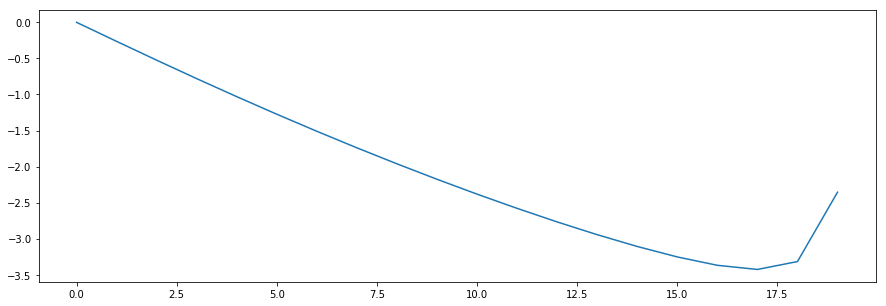

In [168]:
plt.figure(figsize=[15,5])
plt.plot(u_trail[:,0],u_trail[:,1])
plt.show()

### The voltage move towards infinity. Hence the equations are responsible for elevation till now.

### We understood how I boosts v function. Now we shall restrict the ever increasing v using the below equations

If v >= threshold:<br>
<pre>v = c</pre>
<pre>u = u + d</pre><br>

In [89]:
a = 0.02
b = 0.2
c=-45
d=2
I = 15
u = 0*np.ones([1,1])
v=-65*np.ones([1,1])
v_threshold = 30
v_trail=np.array([]).reshape([0,2])
u_trail=np.array([]).reshape([0,2])

In [90]:
for t in range(300):
    print(v)
    print(u)
    u_trail = np.concatenate((u_trail,np.concatenate((t+0*u,u),axis=1)),axis=0)
    v_trail = np.concatenate((v_trail,np.concatenate((t+0*v,v),axis=1)),axis=0)
    if v >= v_threshold:
        v = c #resets the voltage to c
        u = u + d 
    v = v + 0.04*v*v + 5*v +140 -u +I
    u = u + a * (b*v-u)

[[-65.]]
[[0.]]
[[-66.]]
[[-0.264]]
[[-66.496]]
[[-0.524704]]
[[-66.58257536]]
[[-0.78054022]]
[[-66.38533828]]
[[-1.03047077]]
[[-66.00103336]]
[[-1.27386549]]
[[-65.48687849]]
[[-1.51033569]]
[[-64.86968507]]
[[-1.73960772]]
[[-64.15546106]]
[[-1.96143741]]
[[-63.3344016]]
[[-2.17554627]]
[[-62.38100629]]
[[-2.38155937]]
[[-61.24888054]]
[[-2.5789237]]
[[-59.85734485]]
[[-2.76677461]]
[[-58.06122519]]
[[-2.94368402]]
[[-55.5794323]]
[[-3.10712806]]
[[-51.80653395]]
[[-3.25221164]]
[[-45.23031366]]
[[-3.36808866]]
[[-31.18254235]]
[[-3.42545706]]
[[10.22424086]]
[[-3.31605095]]
[[223.84290013]]
[[-2.35435833]]
[[-33.64564167]]
[[-0.48185373]]
[[-1.11082814]]
[[-0.47665997]]
[[148.86104868]]
[[0.12831742]]
[[-36.12831742]]
[[1.94123781]]
[[-11.50092955]]
[[1.85640933]]
[[89.42886858]]
[[2.17699662]]
[[-38.17699662]]
[[3.9407487]]
[[-19.70340558]]
[[3.7831201]]
[[48.52541408]]
[[3.90155936]]
[[-39.90155936]]
[[5.62392193]]
[[-26.34790051]]
[[5.40605189]]
[[19.27501949]]
[[5.37503093]]
[

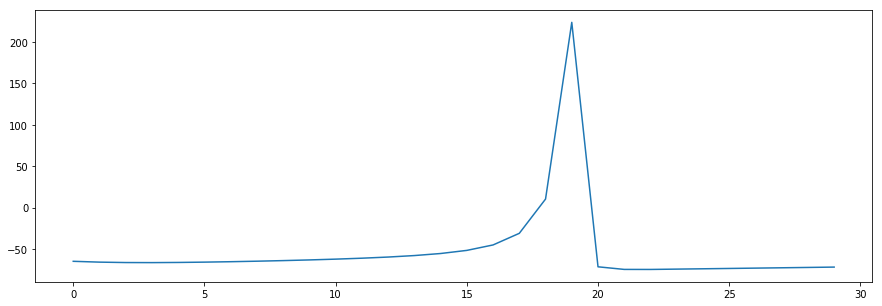

In [73]:
plt.figure(figsize=[15,5])
plt.plot(v_trail[:,0],v_trail[:,1])
plt.show()

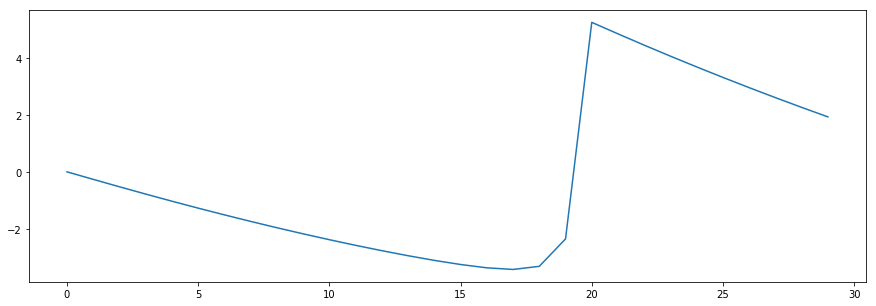

In [74]:
### Lets see how value of u varies across time

plt.figure(figsize=[15,5])
plt.plot(u_trail[:,0],u_trail[:,1])
plt.show()

As we can see the recovery variable maximized 


d decides how much time is needed to again fire another spike
Ex: After a spike is generated, the membrane voltage v comes down to c . If we compare d=0.2 and 4 , then we significantly notice that the spike fires soon for d = 0.2 whereas the next spike is delayed in d=4



#### d=8

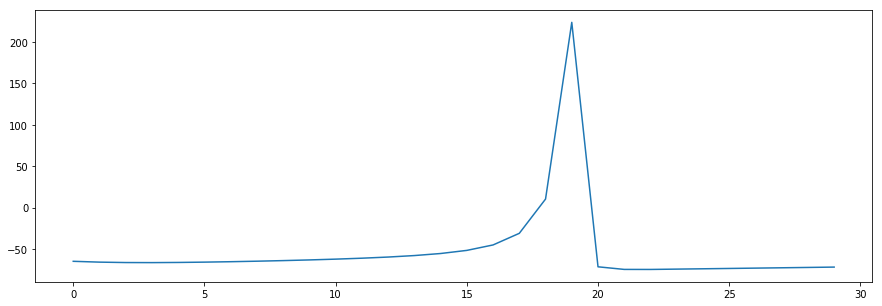

In [51]:
plt.figure(figsize=[15,5])
plt.plot(v_trail[:,0],v_trail[:,1])
plt.show()

#### d=0.2

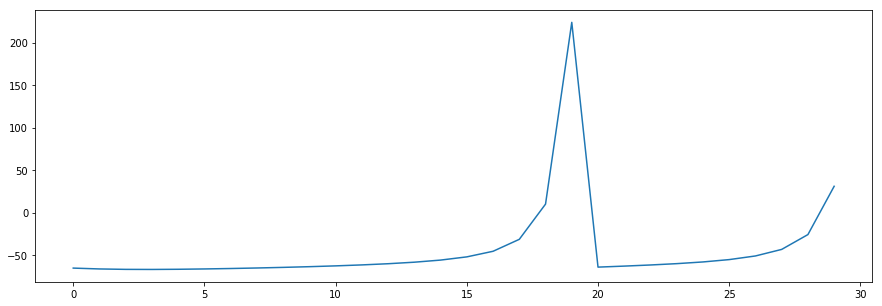

In [56]:
plt.figure(figsize=[15,5])
plt.plot(v_trail[:,0],v_trail[:,1])
plt.show()

#### c parameter defines the reset value of membrane potential

When c=-55 and d=0.02, The RS is converted to intrinsic bursts where spikes are generated fast because of low reset voltage and low d value

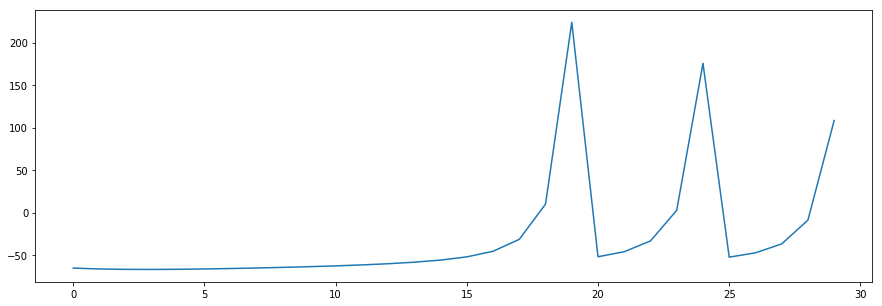

In [70]:
plt.figure(figsize=[15,5])
plt.plot(v_trail[:,0],v_trail[:,1])
plt.show()

If we still decrease the value of C to -45, we get to chattering neurons

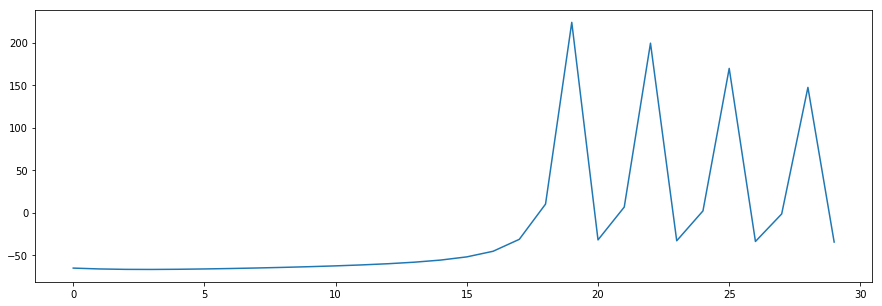

In [78]:
plt.figure(figsize=[15,5])
plt.plot(v_trail[:,0],v_trail[:,1])
plt.show()

If we perform this for some long time, we get the below graph:
this is done for d=2,c=-40. 

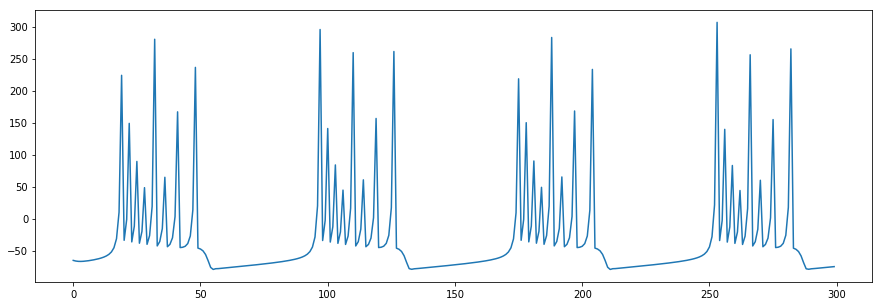

In [87]:
plt.figure(figsize=[15,5])
plt.plot(v_trail[:,0],v_trail[:,1])
plt.show()

The above behaviour is shown because it keeps on spiking until the u value is reset.
When the u value resets , v comes down to resting potential.
We can visualize when u gets reset and come down:

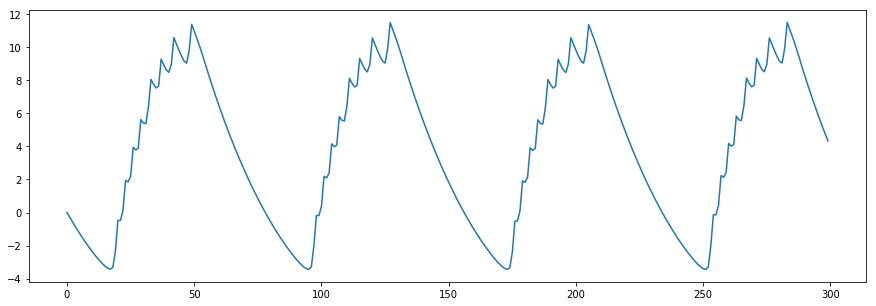

In [91]:
### Lets see how value of u varies across time

plt.figure(figsize=[15,5])
plt.plot(u_trail[:,0],u_trail[:,1])
plt.show()

### LTS Curve

Same as RS curve with less distance between the spikes d=2

In [152]:
a = 0.02
b = 0.25
c=-65
d=2
I = 10
u = 0*np.ones([1,1])
v=-65*np.ones([1,1])
v_threshold = 30
v_trail=np.array([]).reshape([0,2])
u_trail=np.array([]).reshape([0,2])

In [153]:
for t in range(300):
    #print(v)
    #print(u)
    u_trail = np.concatenate((u_trail,np.concatenate((t+0*u,u),axis=1)),axis=0)
    v_trail = np.concatenate((v_trail,np.concatenate((t+0*v,v),axis=1)),axis=0)
    if v >= v_threshold:
        v = c #resets the voltage to c
        u = u + d 
    v = v + 0.04*v*v + 5*v +140 -u +I
    u = u + a * (b*v-u)

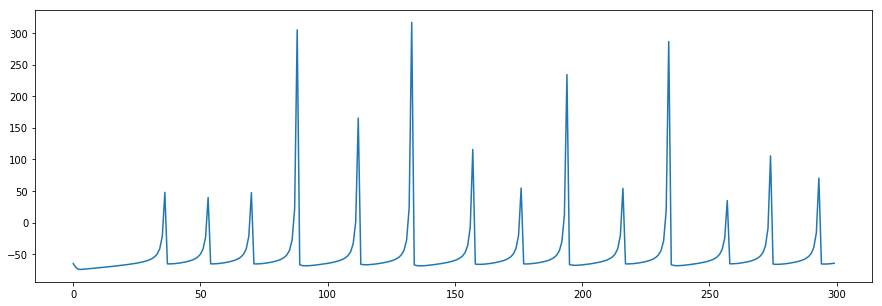

In [154]:
plt.figure(figsize=[15,5])
plt.plot(v_trail[:,0],v_trail[:,1])
plt.show()

### Fast Spiking

In [155]:
a = 0.1
b = 0.2
c=-65
d=2
I = 10
u = 0*np.ones([1,1])
v=-65*np.ones([1,1])
v_threshold = 30
v_trail=np.array([]).reshape([0,2])
u_trail=np.array([]).reshape([0,2])

In [156]:
for t in range(300):
    #print(v)
    #print(u)
    u_trail = np.concatenate((u_trail,np.concatenate((t+0*u,u),axis=1)),axis=0)
    v_trail = np.concatenate((v_trail,np.concatenate((t+0*v,v),axis=1)),axis=0)
    if v >= v_threshold:
        v = c #resets the voltage to c
        u = u + d 
    v = v + 0.04*v*v + 5*v +140 -u +I
    u = u + a * (b*v-u)

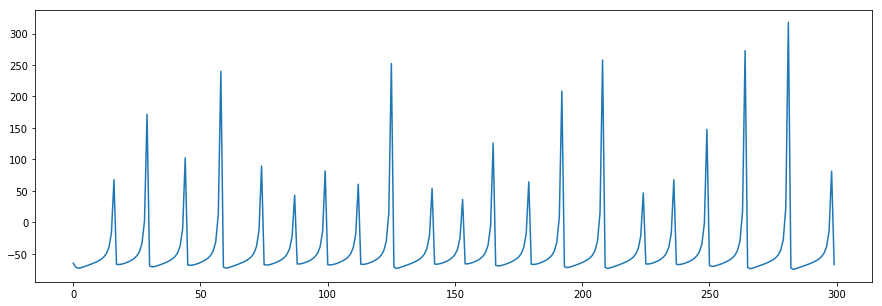

In [157]:
plt.figure(figsize=[15,5])
plt.plot(v_trail[:,0],v_trail[:,1])
plt.show()